# Video Game Success Analysis

This notebook analyzes the extended video game dataset to understand factors contributing to game success.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_theme()

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

## Load and Explore the Data

In [2]:
# Read the extended data
df = pd.read_csv('games_expanded.csv')

# Display basic information about the dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       30000 non-null  int64  
 1   first_release_date       30000 non-null  int64  
 2   game_modes               27792 non-null  object 
 3   genres                   29266 non-null  object 
 4   platforms                30000 non-null  object 
 5   rating                   25621 non-null  float64
 6   rating_count             25621 non-null  float64
 7   similar_games            29569 non-null  object 
 8   slug                     30000 non-null  object 
 9   summary                  29809 non-null  object 
 10  total_rating             30000 non-null  float64
 11  total_rating_count       30000 non-null  int64  
 12  checksum                 30000 non-null  object 
 13  game_type                30000 non-null  int64  
 14  aggregat

In [ ]:
# Display the first few rows
df.head()

,id,first_release_date,game_modes,genres,platforms,rating,rating_count,similar_games,slug,summary,total_rating,total_rating_count,checksum,game_type,aggregated_rating,aggregated_rating_count,player_perspectives,franchises,game_engines,hypes,game_status
0,28012,1490572800,single-player,"puzzle, simulator, strategy, indie","linux, win, mac",80.000000,4.0,"bronze-age, mashinky, another-brick-in-the-mal...",bomb-squad-academy,Save the world one wire at a time with Bomb Sq...,80.000000,4,697b2db0-5f7c-9650-1953-cdc764b9d08e,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1460,1190246400,single-player,"platform, puzzle",ps3,NaN,NaN,"pikuniku, toby-the-secret-mine, dream-alone, s...",locoroco-cocoreccho,LocoRoco Cocoreccho! (or Oideyo LocoRoco!! Buu...,75.000000,2,ccacc0ac-6a02-a85b-dc3f-ee5865635474,0,75.0,2.0,bird-view-slash-isometric,NaN,NaN,NaN,NaN
2,1703,1048204800,"single-player, multiplayer",arcade,"3ds, wiiu, gba",83.571399,85.0,"warioware-touched, warioware-smooth-moves, dre...",warioware-inc-dot-mega-microgame$,Frantic action! Prepare for lightning-quick ga...,87.285699,86,918b75ff-35ae-8f92-b100-53c36facbd43,0,91.0,1.0,third-person,"mario-bros, wario",NaN,NaN,NaN
3,5522,1390521600,single-player,"role-playing-rpg, strategy, turn-based-strateg...","win, mac",64.109642,15.0,"battle-brothers, eternity-the-last-unicorn, en...",blackguards,What happens when the only hope of a threatene...,65.754821,20,2028f843-c137-654b-cfb5-6ddc4de7684a,0,67.4,5.0,bird-view-slash-isometric,the-dark-eye,unity,NaN,NaN
4,190145,1711584000,single-player,"platform, puzzle, adventure, indie","series-x-s, ps4--1, win, ps5, xboxone, switch",NaN,NaN,"quern-undying-thoughts, planet-alpha, unforese...",one-last-breath,"A 2,5D adventure set in a world in which almos...",60.000000,2,60848181-c159-5c3e-86bd-5ba19d3f75ac,0,60.0,2.0,"third-person, side-view",NaN,NaN,1.0,NaN


## Data Quality Check

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

missing_data[missing_data['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

,Missing Values,Percentage
game_status,27456,91.520000
hypes,25762,85.873333
franchises,24551,81.836667
game_engines,22492,74.973333
aggregated_rating_count,16292,54.306667
aggregated_rating,16292,54.306667
player_perspectives,11697,38.990000
rating,4379,14.596667
rating_count,4379,14.596667
game_modes,2208,7.360000


## Game Success Metrics Analysis

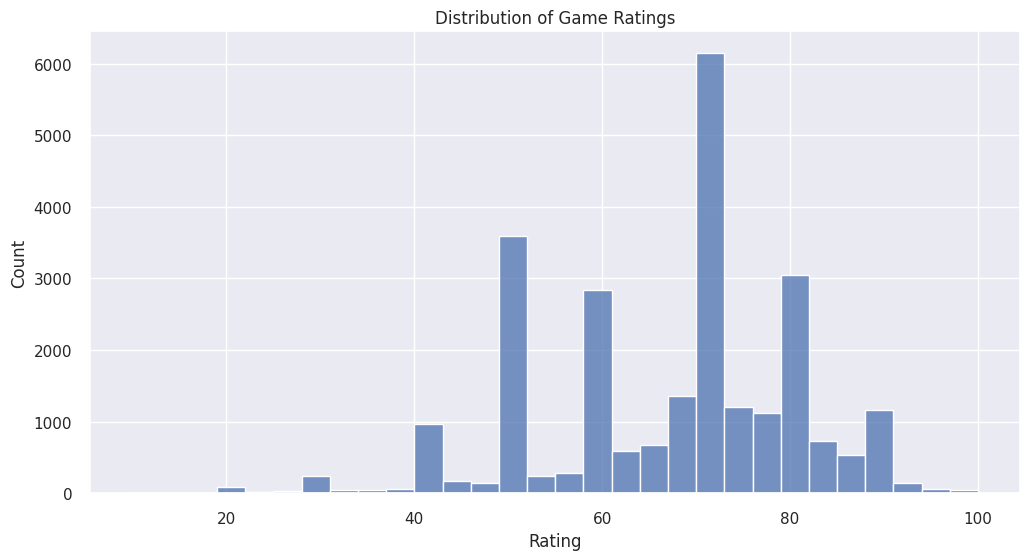


Top 10 Highest Rated Games:


,slug,total_rating,total_rating_count
1784,rgg-land--3,100.000000,16
8950,domino-earning-world,100.000000,6
27435,orc-hunt,100.000000,5
20203,pixadom,99.754463,8
3511,lizards-must-die,99.682862,9
1877,outer-wilds-archaeologist-edition,94.771504,14
17263,metal-gear-solid-the-legacy-collection,93.265387,44
3143,batman-arkham-collection,99.440118,18
6968,batman-arkham-knight-premium-edition,99.357731,11
12240,fuga-melodies-of-steel-2,92.126373,9


In [10]:
# Analyze rating distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='rating', bins=30)
plt.title('Distribution of Game Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Top rated games
print("\nTop 10 Highest Rated Games:")
df.nlargest(10, 'rating')[['slug', 'total_rating', 'total_rating_count']]

## Genre Analysis

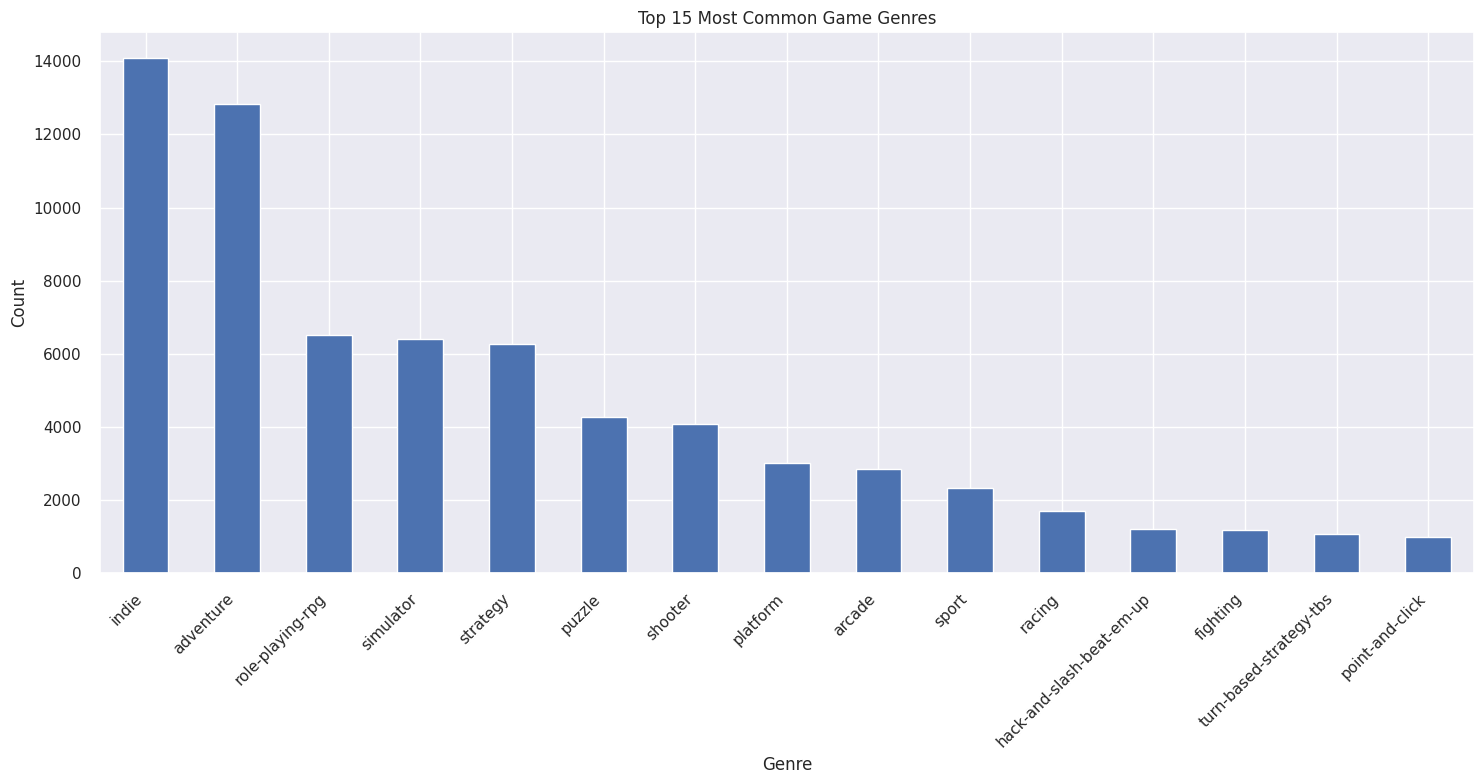

,mean,count
genres,,
"role-playing-rpg, turn-based-strategy-tbs, adventure",79.584495,64
"puzzle, arcade",74.954900,89
"shooter, platform, adventure",74.878248,64
"platform, puzzle, adventure",74.756317,94
"fighting, arcade",74.620164,83
"role-playing-rpg, hack-and-slash-beat-em-up, adventure",73.952557,114
"role-playing-rpg, simulator",73.830730,102
"shooter, role-playing-rpg, adventure",73.528367,110
"platform, role-playing-rpg, adventure, indie",72.354436,88


In [12]:
# Analyze genres
genre_counts = df['genres'].str.split(',').explode().str.strip().value_counts()

plt.figure(figsize=(15, 8))
genre_counts.head(15).plot(kind='bar')
plt.title('Top 15 Most Common Game Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Average rating by genre
genre_ratings = df.explode('genres').groupby('genres')['total_rating'].agg(['mean', 'count'])
genre_ratings = genre_ratings[genre_ratings['count'] > 50]  # Filter genres with sufficient data
genre_ratings.sort_values('mean', ascending=False).head(10)

## Platform Analysis

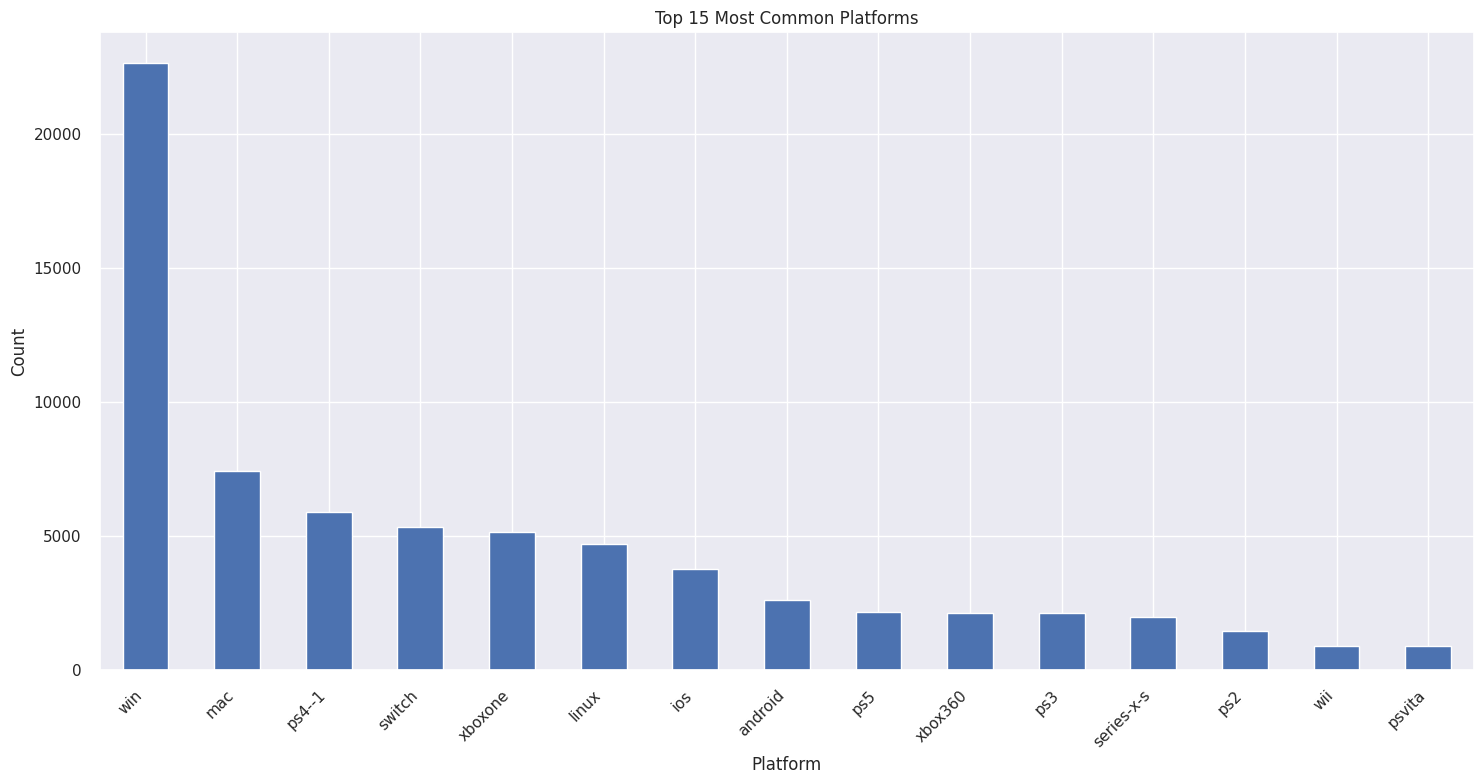

,mean,count
platforms,,
ios,79.402149,651
browser,78.171009,68
"wiiu, gba",76.488602,53
ps4--1,76.143956,68
switch,74.817735,199
ps3,74.687429,111
"ps4--1, xboxone",73.445928,66
xboxone,73.323984,97
"android, ios",73.170985,432


In [13]:
# Analyze platforms
platform_counts = df['platforms'].str.split(',').explode().str.strip().value_counts()

plt.figure(figsize=(15, 8))
platform_counts.head(15).plot(kind='bar')
plt.title('Top 15 Most Common Platforms')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Average rating by platform
platform_ratings = df.explode('platforms').groupby('platforms')['rating'].agg(['mean', 'count'])
platform_ratings = platform_ratings[platform_ratings['count'] > 50]  # Filter platforms with sufficient data
platform_ratings.sort_values('mean', ascending=False).head(10)

## Release Year Analysis

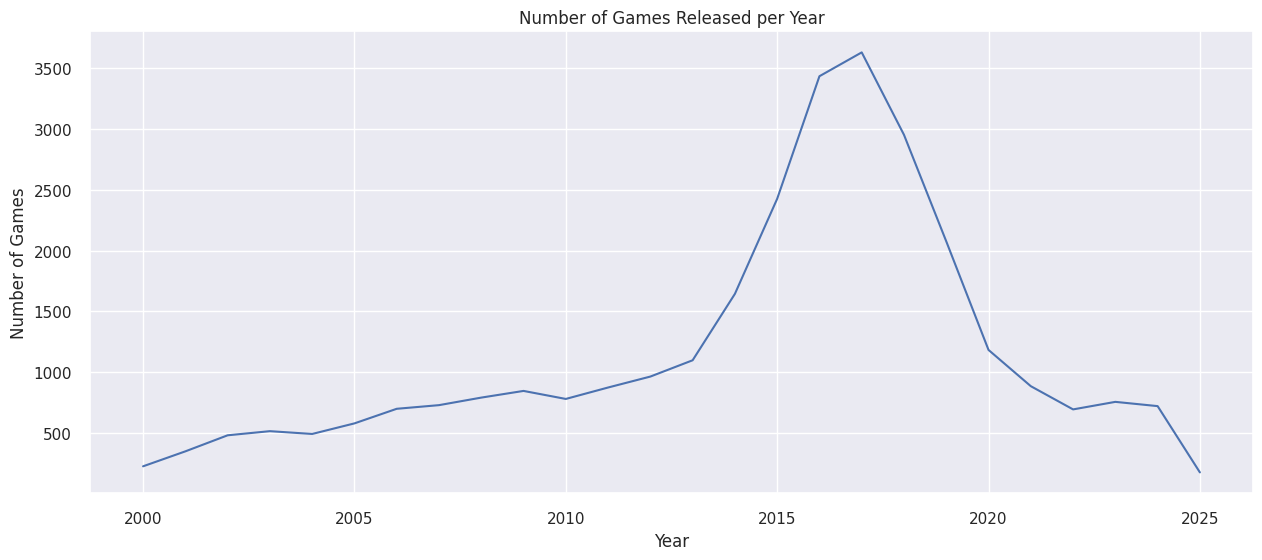

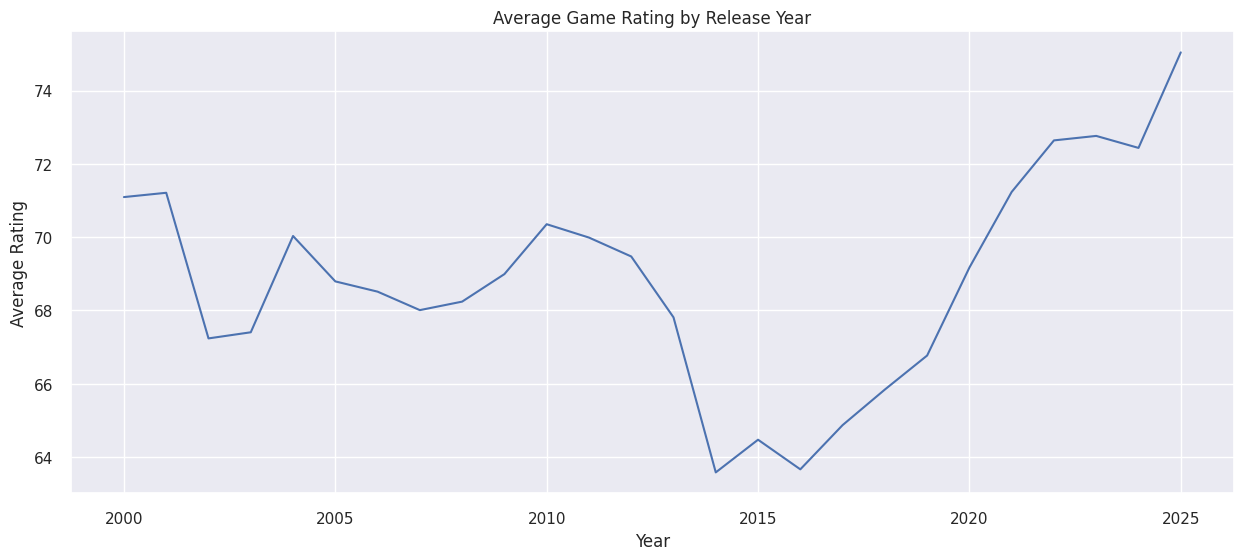

In [14]:
# Convert release date to datetime and extract year
df['release_year'] = pd.to_datetime(df['first_release_date'], unit='s').dt.year

# Games released per year
plt.figure(figsize=(15, 6))
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()

# Average rating by year
yearly_ratings = df.groupby('release_year')['rating'].agg(['mean', 'count'])
yearly_ratings = yearly_ratings[yearly_ratings['count'] > 50]  # Filter years with sufficient data

plt.figure(figsize=(15, 6))
yearly_ratings['mean'].plot(kind='line')
plt.title('Average Game Rating by Release Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

## Correlation Analysis

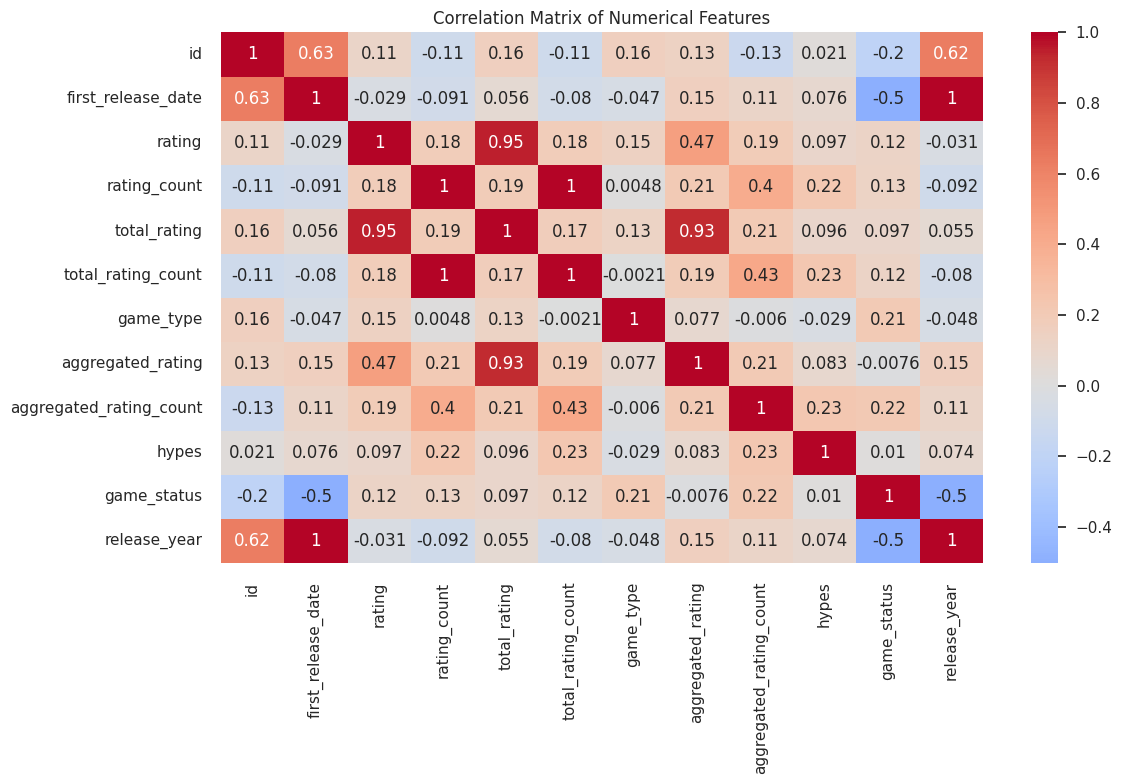

In [15]:
# Select numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Create correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()